In [4]:
import os, pickle, jax
os.chdir('..' if os.getcwd().endswith("/eugene") else '.')

jax.config.update('jax_platform_name', 'cpu')
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import pandas as pd
from eugene.vae import VAE
from flax import nnx
import matplotlib.pyplot as plt

import numpy as np
test_fname = "/data/celeba/celeba_test_images.npy"
test = np.load(test_fname)# , mmap_mode='r')
test = test[:32]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

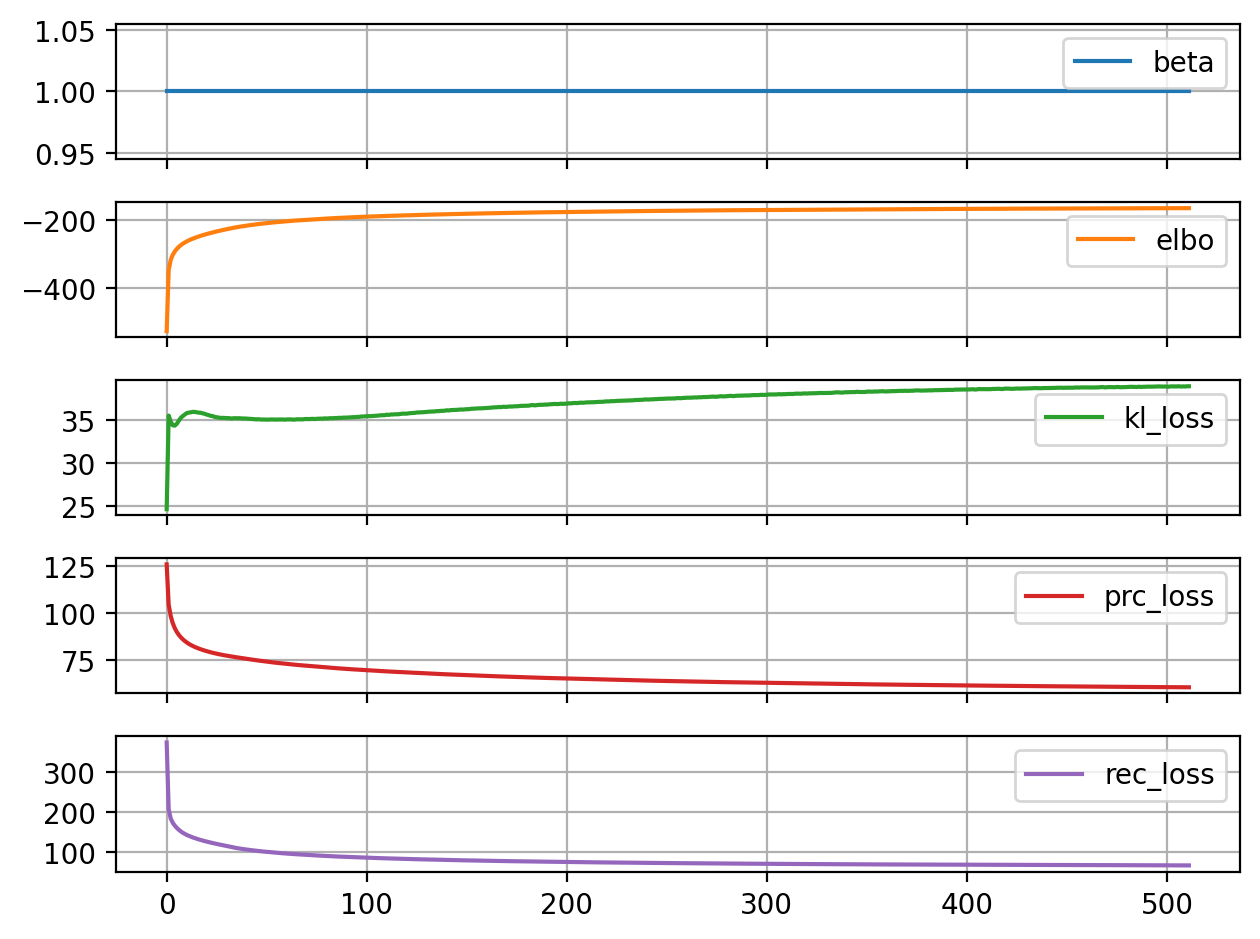

In [5]:
with open('eugene/latest.pickle', 'rb') as file:
    model_dict = pickle.load(file)

model = VAE(rngs=nnx.Rngs(0))

model.opts = model_dict['opts']
model.stats = model_dict['stats']
nnx.update(model, model_dict['state'])

df = pd.DataFrame(model.stats['train'])
df.plot(subplots=True)

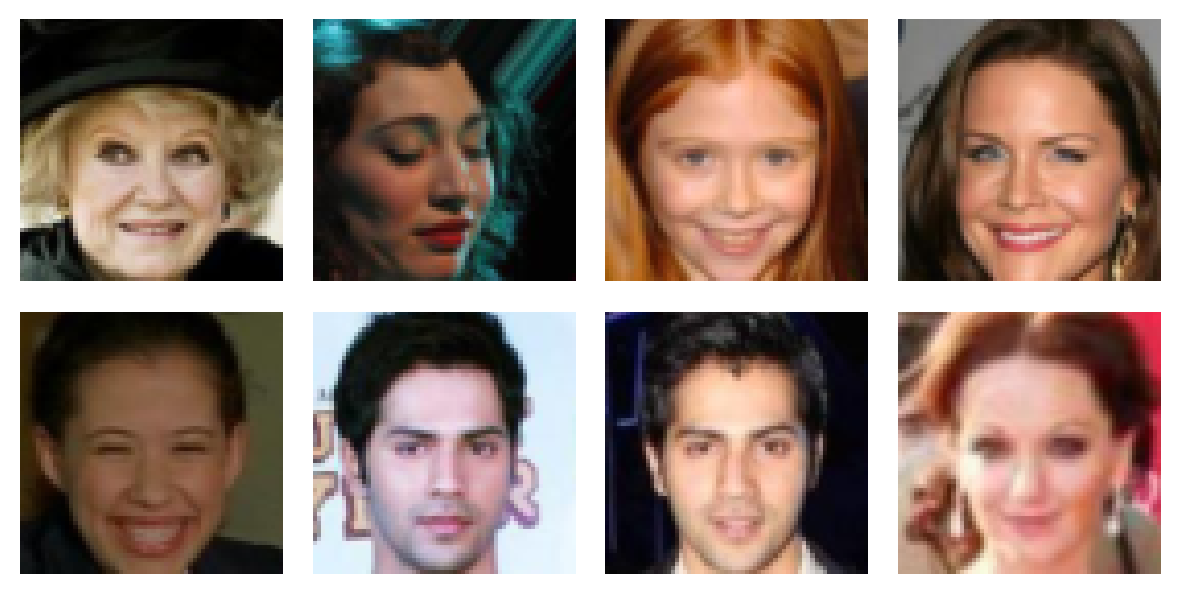

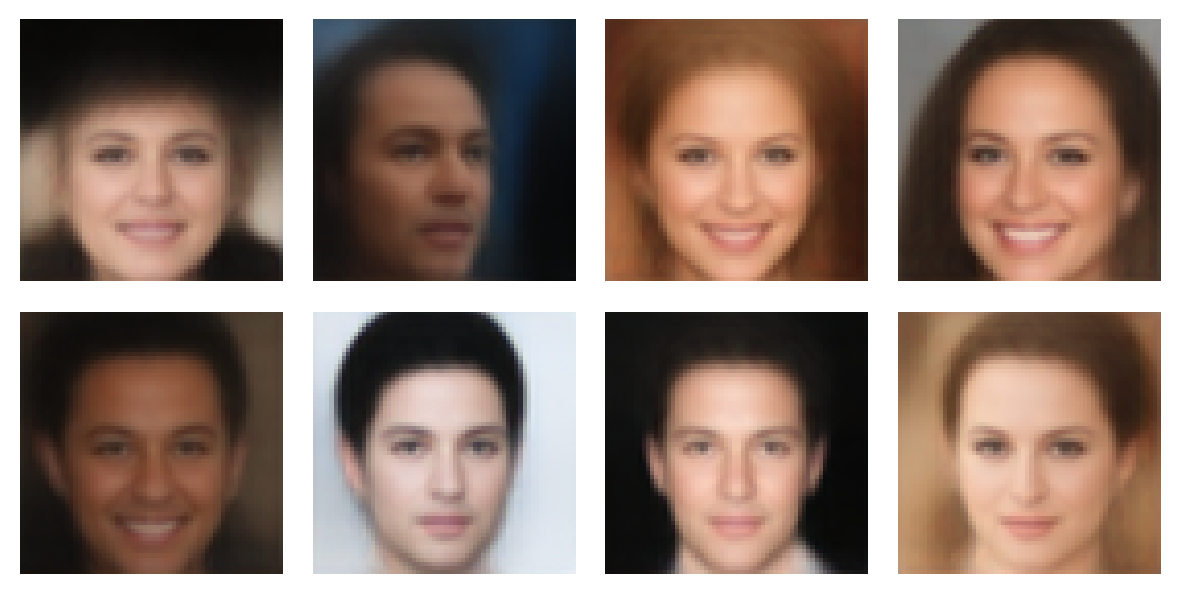

In [6]:
_, z_mu, _ = model(test, reparam=False)
x = nnx.vmap(lambda z, d: d(z), in_axes=(None, 0))(z_mu, model.decoder)
x = x.mean(axis=0)
# median
# x = np.percentile(x, 50, axis=0)

plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(test[i], cmap='gray')
    plt.axis('off')

plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.015678823..1.0378406].


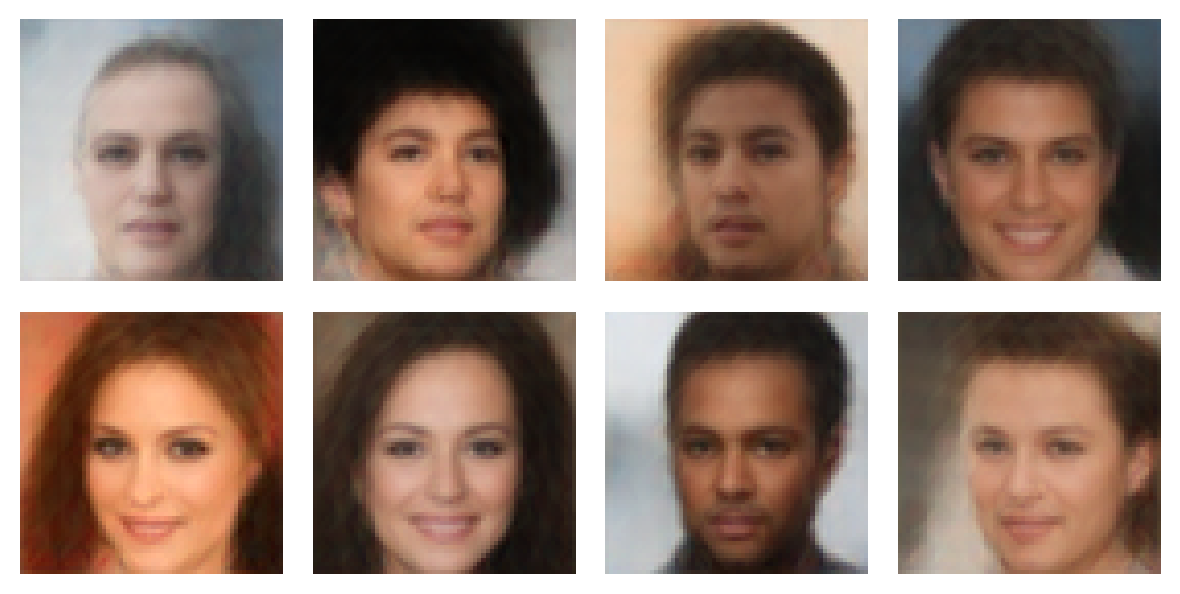

In [8]:
z = jax.random.normal(model.rngs(), (8, model.opts.dz)) * 1.0
x = model.decode(z)#.transpose(0, 2, 1, 3)
# plot x as an image grid
plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')

# plt.imshow(x[0]., cmap='gray')
# plt.grid(False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07167834..1.0054647].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.072769545..1.0861459].


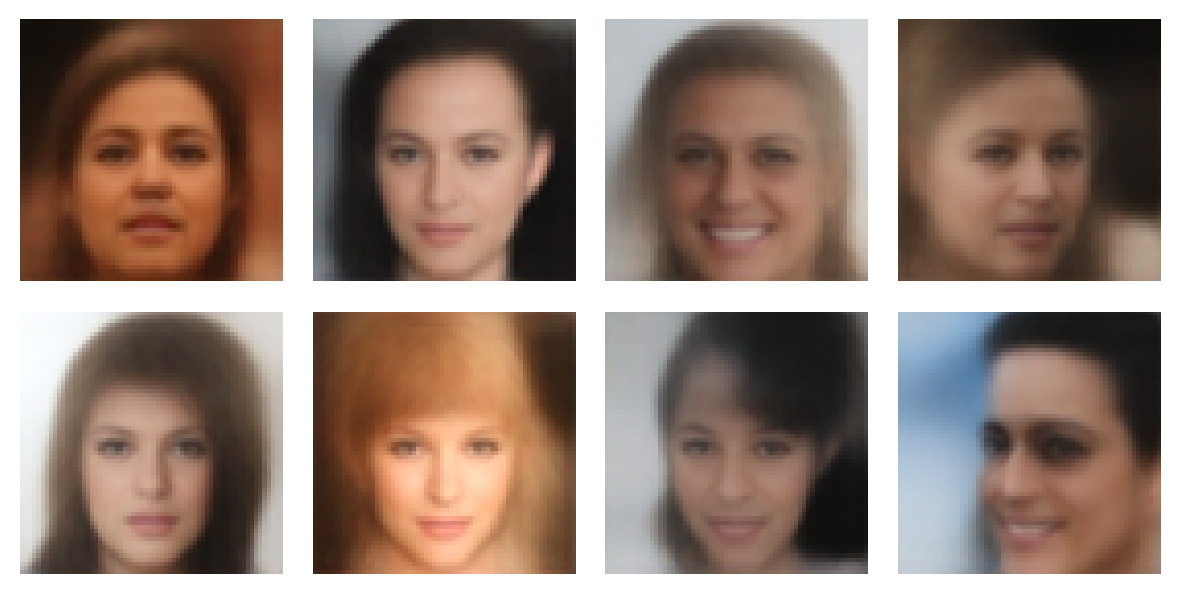

In [14]:
z = jax.random.normal(model.rngs(), (8, model.opts.dz))

x = nnx.vmap(lambda z, d: d(z), in_axes=(None, 0))(z, model.decoder)
x = x.mean(axis=0)

plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024437713..1.345878].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.018960798..1.3428934].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16826947..1.2132446].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07383206..1.1770035].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13138145..1.2343017].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.019660342..1.3746681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00

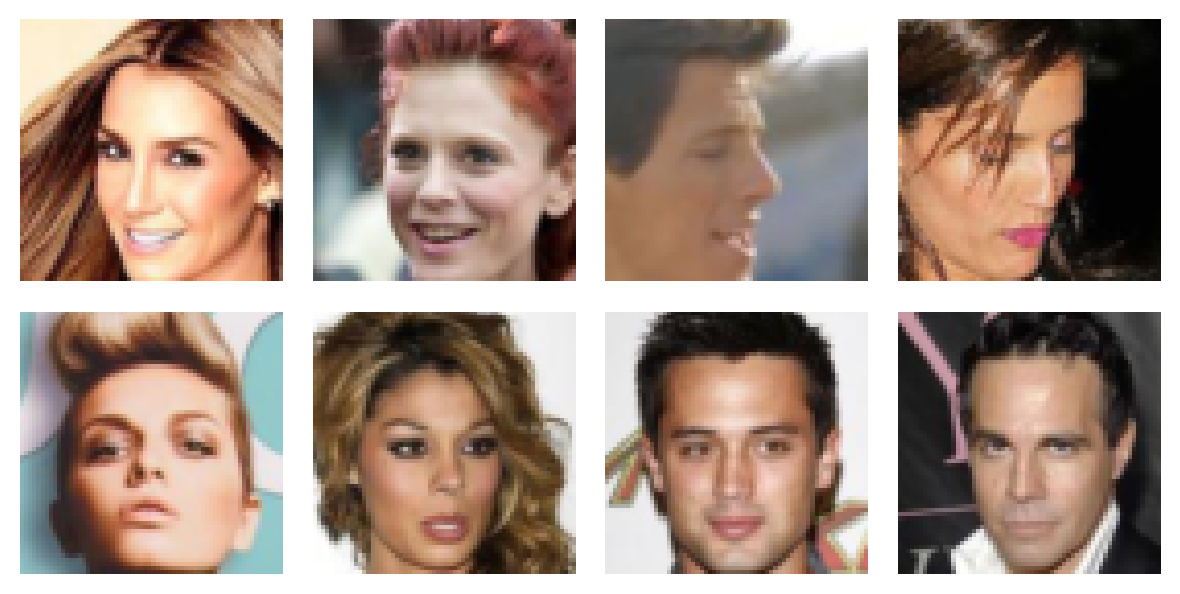

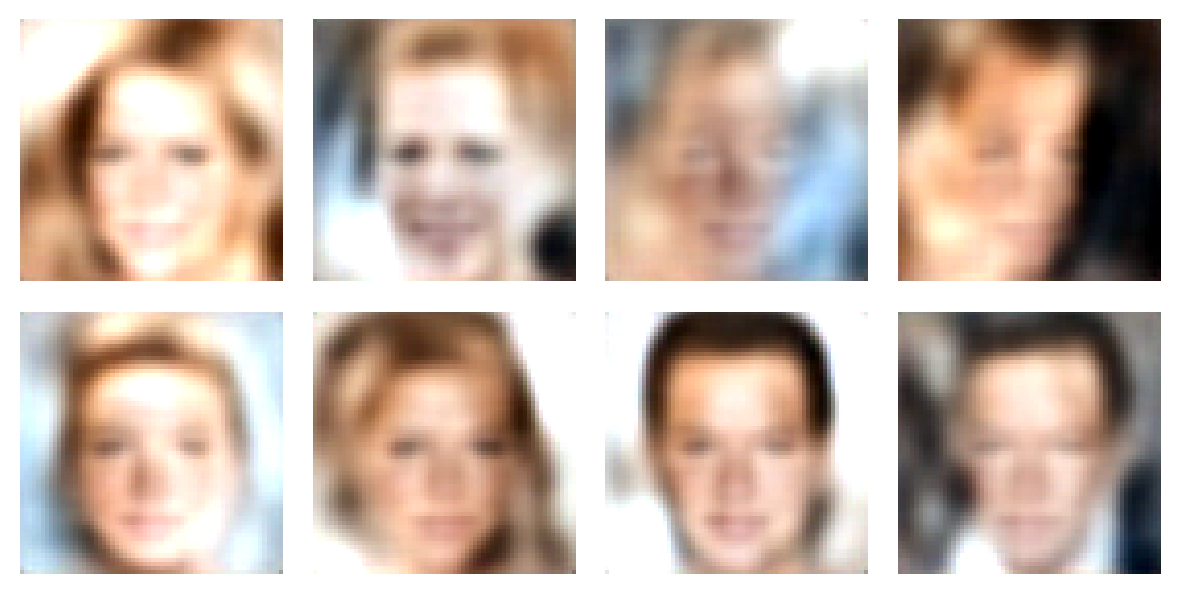